<a href="https://colab.research.google.com/github/megha-66/Deep-Learning-Lab-works-/blob/main/DL_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
#LOAD the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Inspecting the images
print("Shape of training images :", train_images.shape)
print("Shape of testing images : ", test_images.shape)

Shape of training images : (60000, 28, 28)
Shape of testing images :  (10000, 28, 28)


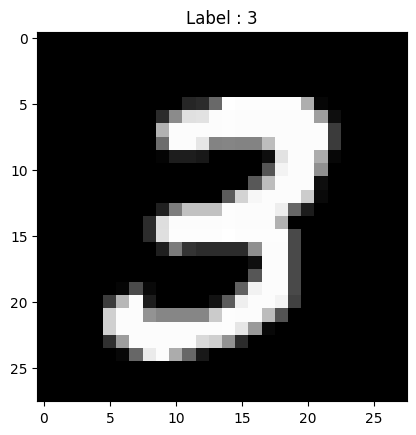

In [ ]:
#Visualizing a sample
import matplotlib.pyplot as plt

sample = train_images[7] # any random image from training set
plt.imshow(sample, cmap = 'gray')
plt.title(f"Label : {train_labels[7]}")
plt.show()



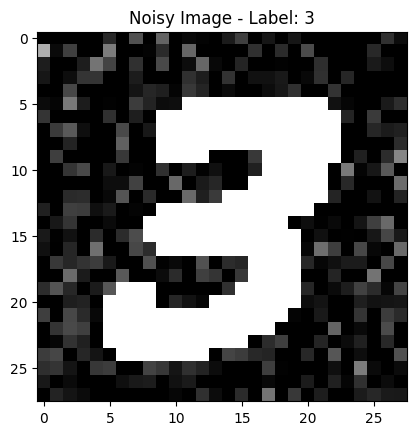

In [ ]:
import numpy as np

#Function to add Gaussian noise
def add_gaussian_noise(images, mean = 0, stddev = 0.1):
    noise  = np.random.normal(mean,stddev, images.shape)
    noisy_images = noise + images
    #Clip values to ensure pixel values are [0,1] range
    noisy_images = np.clip(noisy_images,0.,1.)
    return noisy_images

#Adding gaussian noise to the training & testing datasets
noisy_train_images = add_gaussian_noise(train_images, mean = 0 , stddev = 0.2)
noisy_test_images = add_gaussian_noise(test_images, mean = 0, stddev = 0.2)

#viewing sample noisy image
plt.imshow(noisy_train_images[7], cmap='gray')
plt.title(f"Noisy Image - Label: {train_labels[7]}")
plt.show()




In [ ]:
from tensorflow.keras import layers, models


In [ ]:
def build_denoising_encoder():
  #Encoder
  input_img = layers.Input(shape = (28,28,1))
  x = layers.Conv2D(32,(3,3), activation = 'relu', padding = 'same')(input_img)
  x = layers.MaxPooling2D((2,2),padding = 'same')(x)
  x = layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same')(x)
  encoded = layers.MaxPooling2D((2,2), padding = 'same')(x)

  #Decoder
  x = layers.Conv2DTranspose(64,(3,3), strides = 2, activation = 'relu', padding = 'same')(encoded)
  x = layers.Conv2DTranspose(32,(3,3), strides = 2, activation = 'relu', padding = 'same')(x)
  decoded = layers.Conv2D(1,(3,3), activation = 'sigmoid', padding = 'same')(x)

  #Autoencoder label
  autoencoder = models.Model(input_img, decoded)
  autoencoder.compile(optimizer = 'adam', loss = 'mse')

  return autoencoder

#Build and summarize the model
autoencoder = build_denoising_encoder()
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping




In [ ]:
autoencoder = build_denoising_encoder()
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)


In [ ]:
#Training the autoencoder
history = autoencoder.fit(
    noisy_train_images, train_images,
    epochs = 2,
    batch_size = 64,
    shuffle = True,
    validation_data = (noisy_test_images, test_images),
    callbacks = [early_stopping]

)

Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 169s 180ms/step - loss: 7214.4971 - val_loss: 7342.7886
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 166s 177ms/step - loss: 7209.7959 - val_loss: 7342.7759


In [ ]:
#evaluating this trained model now on the test set
test_loss = autoencoder.evaluate(noisy_test_images, test_images)
print("Test Loss : ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 6866.2910
Test Loss :  7342.7744140625


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


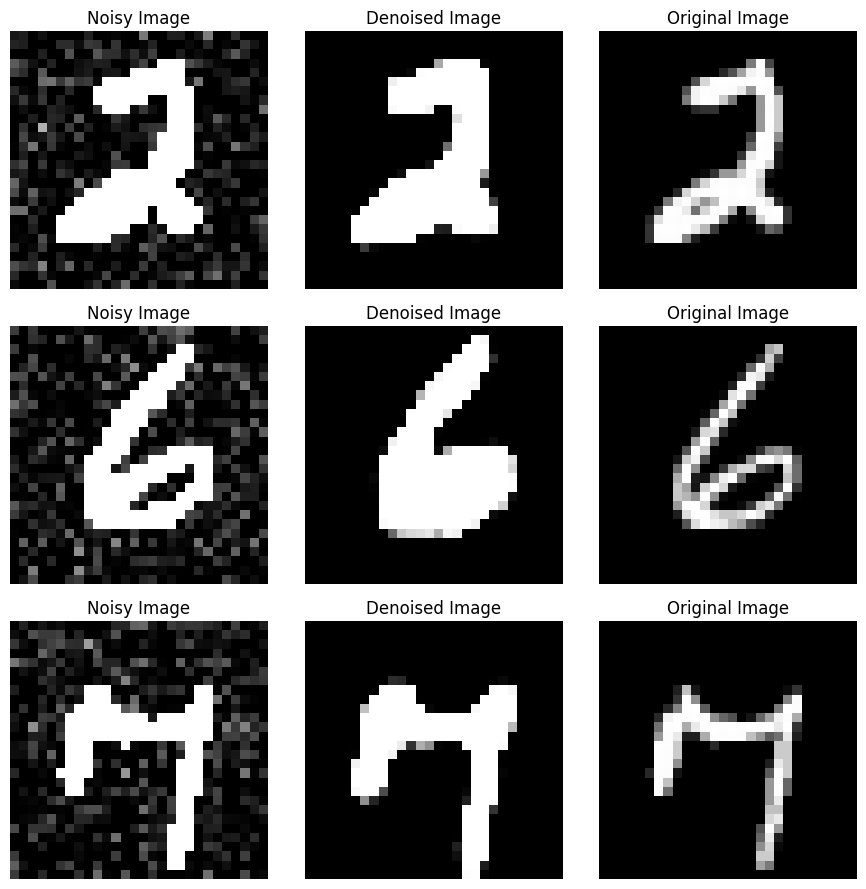

In [ ]:
import matplotlib.pyplot as plt



random_indices = np.random.randint(0, len(noisy_train_images), 3)

# Getting noisy images, clean images, and denoised outputs
noisy_samples = noisy_train_images[random_indices]
clean_samples = train_images[random_indices]
denoised_samples = autoencoder.predict(noisy_samples)

# Plotting the images for comparison
plt.figure(figsize=(9, 3 * 3))

for i in range(3):
    # Noisy image
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(noisy_samples[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy Image")
    plt.axis('off')

    # Denoised image
    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(denoised_samples[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised Image")
    plt.axis('off')

     # Original clean image
    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(clean_samples[i].reshape(28, 28), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

plt.tight_layout()
plt.show()


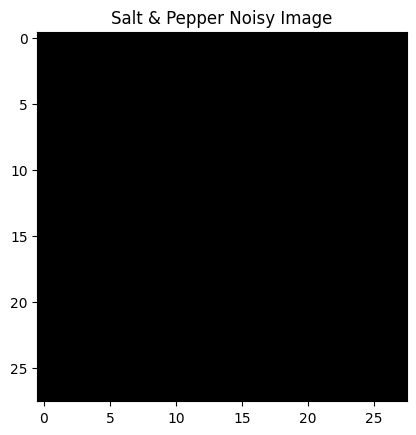

In [ ]:
import numpy as np
#Function to define salt and pepper noise
def add_salt_and_pepper_noise(images, salt_prob=0.1, pepper_prob=0.01):
    noisy_images = np.copy(images)
    total_pixels = images.size

    # Add salt noise (white pixels)
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in images.shape]
    noisy_images[salt_coords] = 1  # Set salt noise to 1 (white)

    # Add pepper noise (black pixels)
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in images.shape]
    noisy_images[pepper_coords] = 0  # Set pepper noise to 0 (black)

    return noisy_images

# Adding salt-and-pepper noise to the training and testing datasets
noisy_train_images_sp = add_salt_and_pepper_noise(train_images, salt_prob=0.9, pepper_prob=0)
noisy_test_images_sp = add_salt_and_pepper_noise(test_images, salt_prob=0.01, pepper_prob=0)

# View a sample noisy image with salt-and-pepper noise
import matplotlib.pyplot as plt
plt.imshow(noisy_train_images_sp[54].reshape(28, 28), cmap='gray')
plt.title("Salt & Pepper Noisy Image")
plt.show()


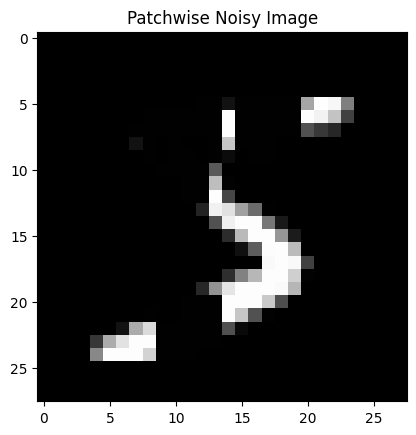

In [ ]:
import numpy as np

def add_patchwise_noise(images, patch_size=(5, 5), num_patches=10, noise_std=0.1):
    noisy_images = np.copy(images).astype(np.float32)
    height, width = images.shape[1], images.shape[2]

    for image in noisy_images:
        for _ in range(num_patches):
           # Randomly select a patch location
             y = np.random.randint(0, height - patch_size[0])
             x = np.random.randint(0, width - patch_size[1])

            # Define the patch region
             patch = image[y:y + patch_size[0], x:x + patch_size[1]]

            # Add Gaussian noise to the patch
             noise = np.random.normal(0, noise_std, patch.shape).astype(np.float32)
             patch += noise

             # Ensure pixel values are within [0, 1]
             patch = np.clip(patch, 0., 1.)
             image[y:y + patch_size[0], x:x + patch_size[1]] = patch

    return noisy_images

# Adding patchwise noise to the training and testing datasets
noisy_train_images_patchwise = add_patchwise_noise(train_images, patch_size=(5, 5), num_patches=10, noise_std=0.1)
noisy_test_images_patchwise = add_patchwise_noise(test_images, patch_size=(5, 5), num_patches=10, noise_std=0.1)

# View a sample noisy image with patchwise noise
import matplotlib.pyplot as plt
plt.imshow(noisy_train_images_patchwise[0].reshape(28, 28), cmap='gray')
plt.title("Patchwise Noisy Image")
plt.show()
